In [191]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sdv import multi_table
from sdv.multi_table.hma import HMASynthesizer
# Basic
import pandas as pd 
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from wordcloud import WordCloud

# Feature Enginerring
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

# Models
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay, accuracy_score
#Save Models
import joblib

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\selim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [192]:
def random_split_data(X, y, train_percentage=0.7, val_percentage=0.15, test_percentage=0.15, random_state=None):
    """
    Randomly splits the data into training, validation, and test sets.

    Parameters:
    - X: Feature matrix (sparse matrix)
    - y: Labels (dense array)
    - train_percentage: Percentage of data for training (default is 0.7)
    - val_percentage: Percentage of data for validation (default is 0.15)
    - test_percentage: Percentage of data for testing (default is 0.15)
    - random_state: Seed for random number generation (default is None)

    Returns:
    - X_train, y_train: Training set
    - X_val, y_val: Validation set
    - X_test, y_test: Test set
    """
    # Split data into training, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(val_percentage + test_percentage), random_state=random_state)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_percentage/(val_percentage + test_percentage), random_state=random_state)

    return X_train, y_train, X_val, y_val, X_test, y_test

In [193]:
data = pd.read_csv('dataset.csv')

In [194]:
def summarize_dataset(data, num_head=5, num_tail=5, drop_columns=None, drop_duplicates=False):
    """
    Summarizes a DataFrame.

    Parameters:
    data (DataFrame): The DataFrame to summarize.
    num_head (int): Specifies how many rows to display from the beginning.
    num_tail (int): Specifies how many rows to display from the end.
    drop_columns (list): List of columns to drop.
    drop_duplicates (bool): Used to remove duplicates from the DataFrame.

    Returns:
    DataFrame: The processed DataFrame.
    """
    print(f"First {num_head} rows:")
    print(data.head(num_head))
    print("\n")
    
    print(f"Last {num_tail} rows:")
    print(data.tail(num_tail))
    print("\n")
    
    print("Columns:")
    print(data.columns)
    print("\n")

    print("Data Information:")
    data.info()
    print("\n")
    
    missing_values = data.isnull().sum()
    missing_columns = missing_values[missing_values > 0]
    print(f"Missing Values:\n{missing_columns}")
    print("\n")
    
    print("Statistical Summary:")
    print(data.describe())
    print("\n")
    
    print("Data Shape:")
    print(data.shape)
    print("\n")
    
    num_duplicates = data.duplicated().sum()
    print(f"Number of duplicated rows: {num_duplicates}")
    print("\n")

    if drop_duplicates:
        initial_rows = data.shape[0]  
        if drop_columns:
            data.drop_duplicates(subset=drop_columns, inplace=True)
        else:
            data.drop_duplicates(inplace=True)
        dropped_rows = initial_rows - data.shape[0]  
        print(f"Number of dropped rows: {dropped_rows}")
    return data

In [195]:
summarize_dataset(data, drop_duplicates=False)

First 5 rows:
      sr      rr       t      lm      bo    rem   sr.1     hr  sl
0  93.80  25.680  91.840  16.600  89.840  99.60  1.840  74.20   3
1  91.64  25.104  91.552  15.880  89.552  98.88  1.552  72.76   3
2  60.00  20.000  96.000  10.000  95.000  85.00  7.000  60.00   1
3  85.76  23.536  90.768  13.920  88.768  96.92  0.768  68.84   3
4  48.12  17.248  97.872   6.496  96.248  72.48  8.248  53.12   0


Last 5 rows:
         sr      rr       t      lm      bo     rem   sr.1     hr  sl
625  69.600  20.960  92.960  10.960  90.960   89.80  3.440  62.40   2
626  48.440  17.376  98.064   6.752  96.376   73.76  8.376  53.44   0
627  97.504  27.504  86.880  17.752  84.256  101.88  0.000  78.76   4
628  58.640  19.728  95.728   9.728  94.592   84.32  6.728  59.32   1
629  73.920  21.392  93.392  11.392  91.392   91.96  4.088  63.48   2


Columns:
Index(['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sr.1', 'hr', 'sl'], dtype='object')


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeI

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


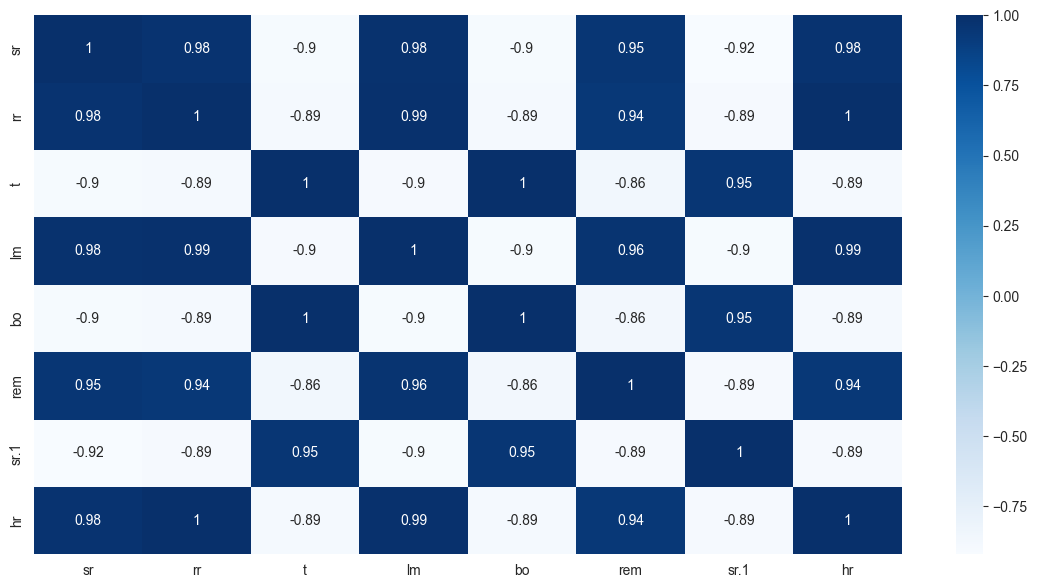

In [196]:
matrix =data.iloc[:,:-1].corr()
plt.figure(figsize = (14,7))
lit = sns.heatmap(matrix, annot=True, cmap="Blues")

In [197]:
data2 = pd.read_csv("dataset2.csv")

In [198]:
summarize_dataset(data2, drop_duplicates=False)

First 5 rows:
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80    

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [199]:
df1 = pd.DataFrame(data)
df2 = pd.DataFrame(data2)

df1.rename(columns={'sl': 'Stress Level'}, inplace=True)


In [200]:
df2[['Systolic', 'Diastolic']] = df2['Blood Pressure'].str.split('/', expand=True).apply(pd.to_numeric)
df2 = df2.drop('Blood Pressure', axis=1)


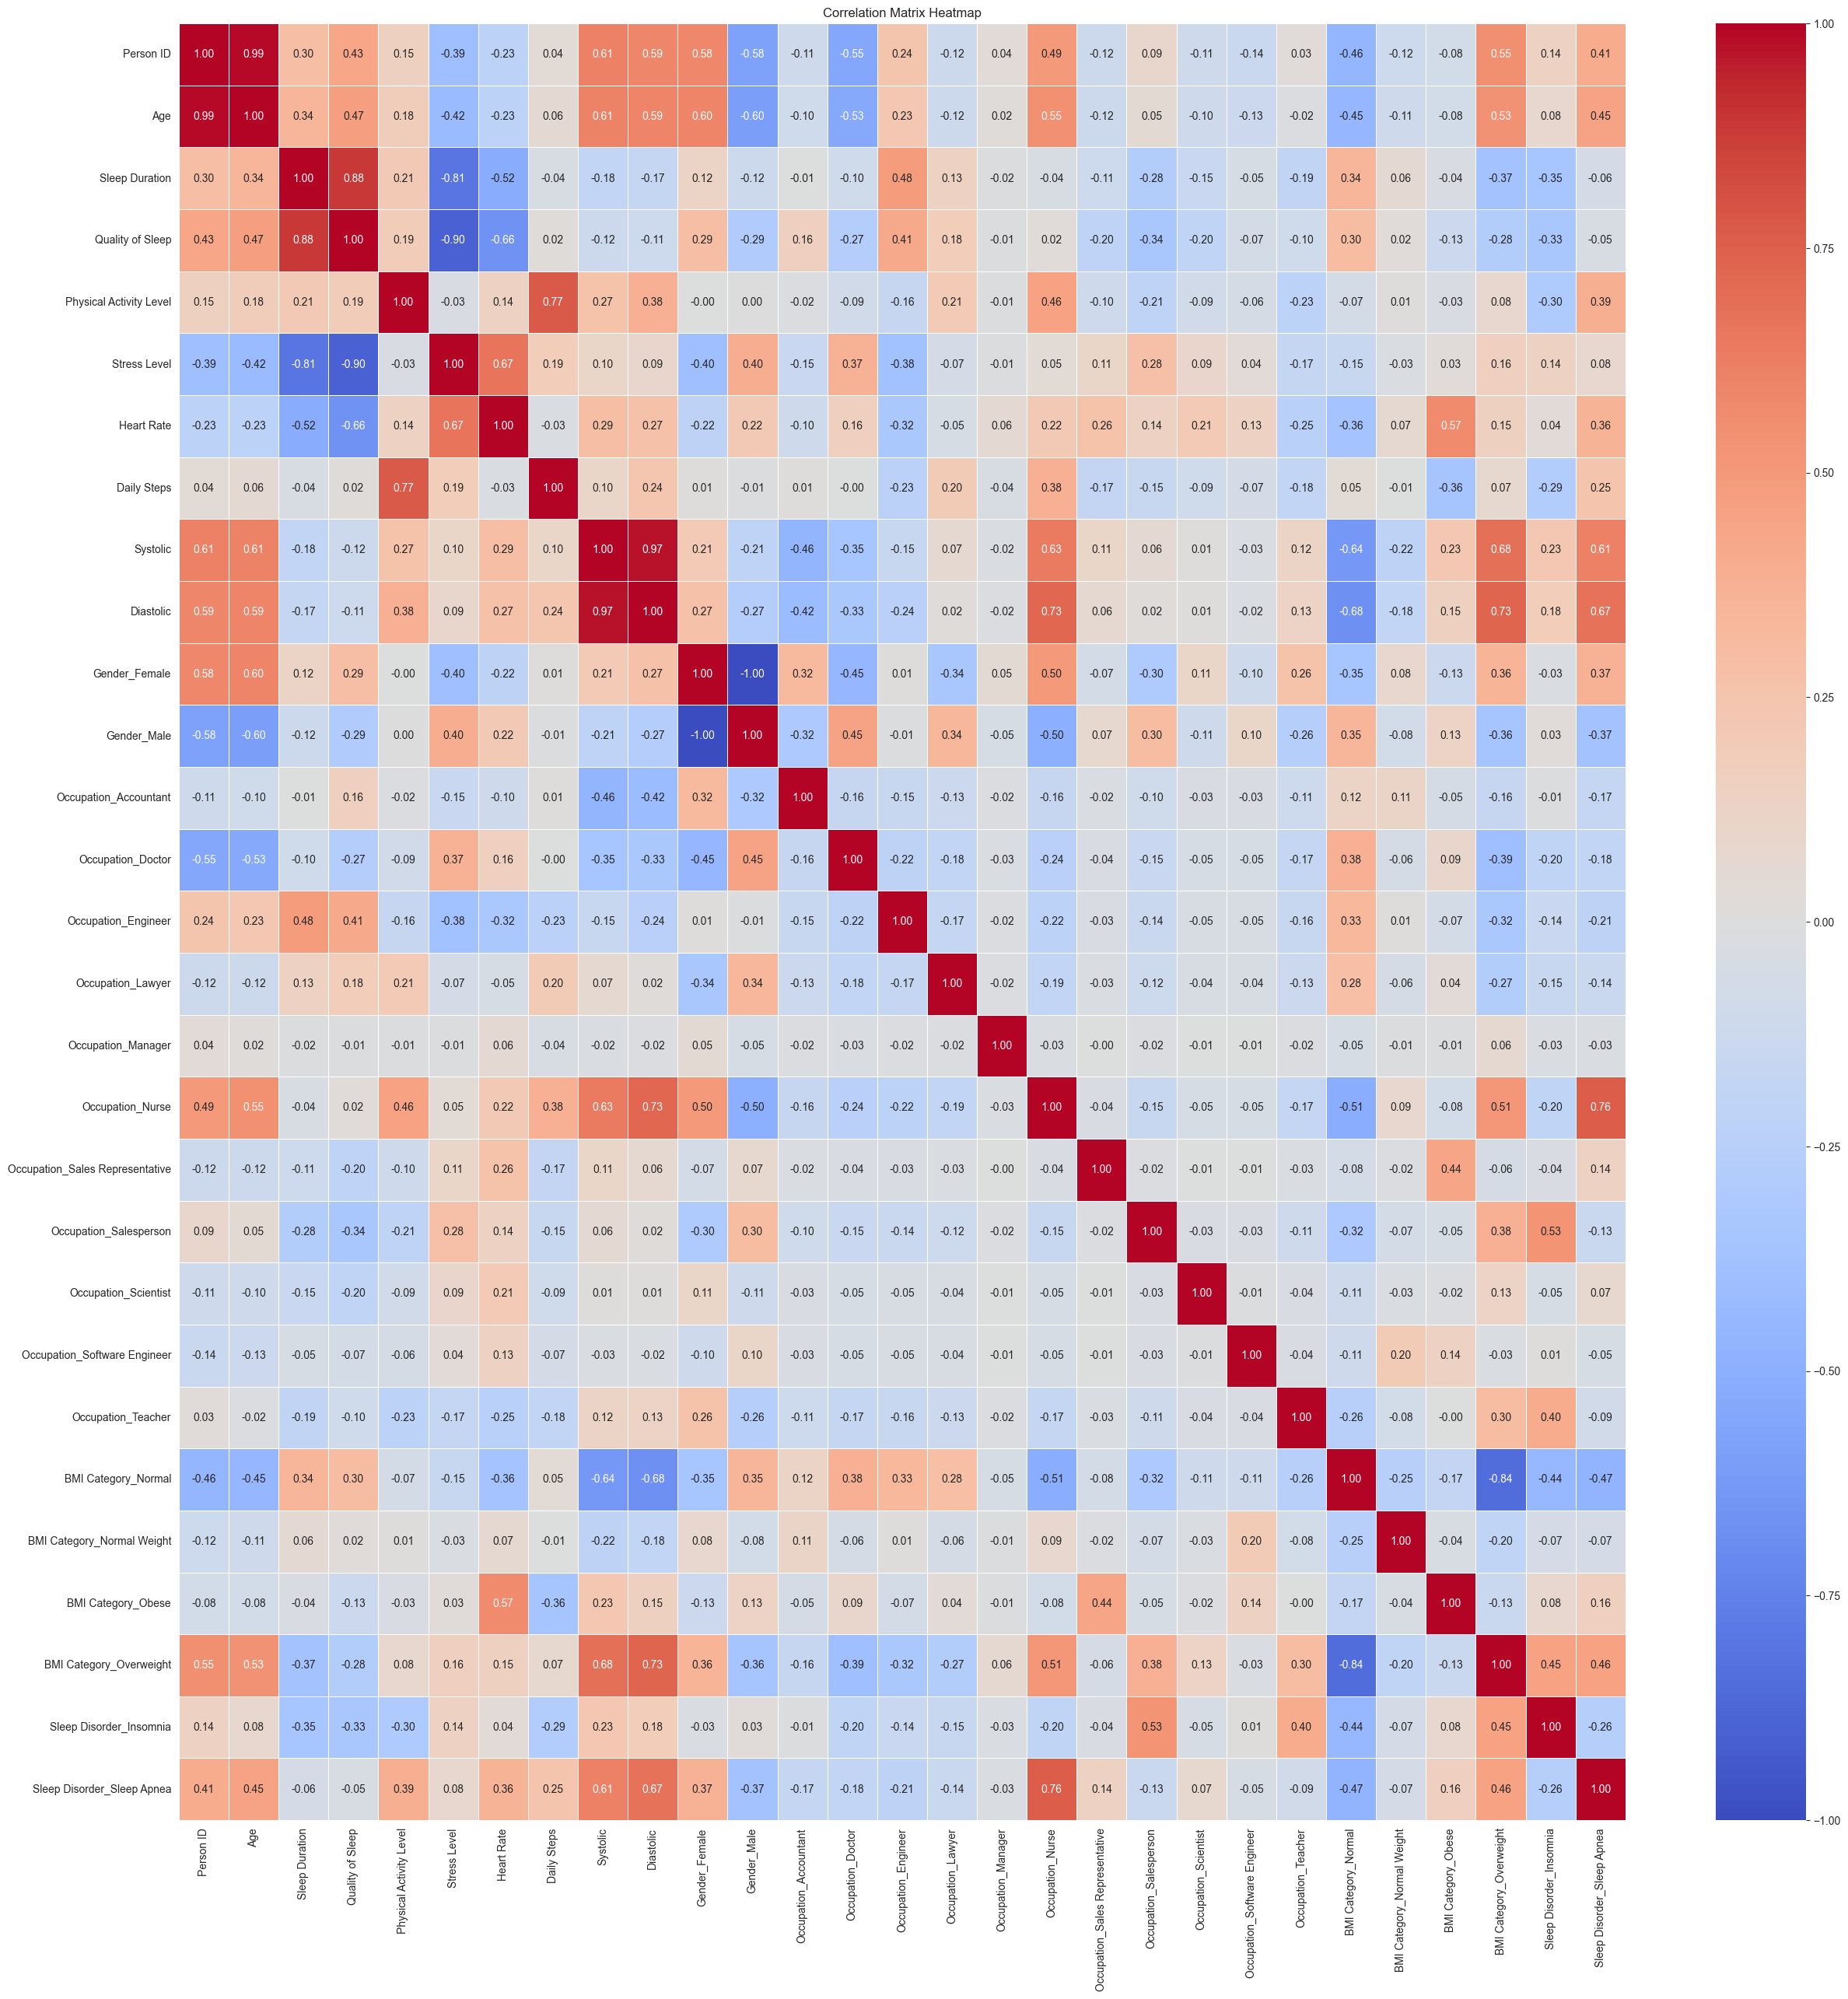

In [201]:
    # One-hot encode categorical variables 
df_encoded = pd.get_dummies(df2, columns=['Gender', 'Occupation', 'BMI Category',"Sleep Disorder"])

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [202]:
correlations_with_target = correlation_matrix['Stress Level'].sort_values(ascending=False)

print(correlations_with_target)



Stress Level                       1.000000
Heart Rate                         0.670026
Gender_Male                        0.396018
Occupation_Doctor                  0.368038
Occupation_Salesperson             0.278757
Daily Steps                        0.186829
BMI Category_Overweight            0.157406
Sleep Disorder_Insomnia            0.139380
Occupation_Sales Representative    0.108196
Systolic                           0.102818
Occupation_Scientist               0.094753
Diastolic                          0.091811
Sleep Disorder_Sleep Apnea         0.081582
Occupation_Nurse                   0.045274
Occupation_Software Engineer       0.036081
BMI Category_Obese                 0.029459
Occupation_Manager                -0.011250
BMI Category_Normal Weight        -0.026776
Physical Activity Level           -0.034134
Occupation_Lawyer                 -0.068714
Occupation_Accountant             -0.147791
BMI Category_Normal               -0.151259
Occupation_Teacher              

In [203]:
occupation_columns = [col for col in correlation_matrix.columns if 'Occupation' in col]
gender_columns = [col for col in correlation_matrix.columns if 'Gender' in col]
bmi_columns = [col for col in correlation_matrix.columns if 'BMI Category' in col]
sleep_columns = [col for col in correlation_matrix.columns if 'Sleep' in col]

# Her bir kategorik değişken grubu için korelasyon toplamını hesaplayın
sum_occupation = correlation_matrix.loc[occupation_columns, occupation_columns].sum().sum()
sum_gender = correlation_matrix.loc[gender_columns, gender_columns].sum().sum()
sum_bmi = correlation_matrix.loc[bmi_columns, bmi_columns].sum().sum()
sum_sleep = correlation_matrix.loc[sleep_columns, sleep_columns].sum().sum()


In [204]:
sum_occupation,sum_gender,sum_bmi,sum_sleep

(2.428507144167685,
 2.220446049250313e-16,
 0.7117241100990478,
 3.6618629378795973)

In [205]:
# bmi nın correlasyonu cok az droplayabılırız

In [206]:
df2 = df2.drop(['BMI Category'], axis=1)

In [207]:
df2

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,77,4200,NaN,126,83
1,2,Male,28,Doctor,6.2,6,60,8,75,10000,NaN,125,80
2,3,Male,28,Doctor,6.2,6,60,8,75,10000,NaN,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,68,7000,Sleep Apnea,140,95


In [208]:
df2["Stress Level"].value_counts()

Stress Level
3    71
8    70
4    70
5    67
7    50
6    46
Name: count, dtype: int64

In [209]:
df1["Stress Level"].value_counts()

Stress Level
3    126
1    126
0    126
2    126
4    126
Name: count, dtype: int64

In [210]:

from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df1)

In [211]:
from sdv.single_table import TVAESynthesizer

synthesizer = TVAESynthesizer(metadata)
synthesizer.fit(df1)

# synthetic_data = synthesizer.sample(num_rows=5000)

In [212]:
# synthetic_data.to_csv('synthetic_data2.csv', index=False)

In [213]:
synthetic_data = pd.read_csv('synthetic_data2.csv')

In [214]:
metadata2 = SingleTableMetadata()
metadata2.detect_from_dataframe(df2)
synthesizer2 = TVAESynthesizer(metadata2)
synthesizer2.fit(df2)

synthetic_data2 = synthesizer2.sample(num_rows=10)

In [215]:

merged_synthetic_data = pd.merge(synthetic_data, synthetic_data2, on='Stress Level', how='left')
merged_synthetic_data

,sr,rr,t,lm,bo,rem,sr.1,hr,Stress Level,Person ID,...,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,45.000,17.308,97.156,5.104,95.693,62.94,6.945,52.40,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.880,27.354,86.466,17.289,84.906,100.92,0.000,77.60,4,5.0,...,38.0,Lawyer,7.2,8.0,60.0,68.0,6981.0,NaN,118.0,75.0
2,98.880,27.354,86.466,17.289,84.906,100.92,0.000,77.60,4,7.0,...,37.0,Engineer,7.8,8.0,59.0,68.0,8001.0,NaN,119.0,80.0
3,54.972,19.508,92.304,6.262,93.627,84.77,5.741,59.92,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68.256,25.066,91.339,12.287,88.156,96.11,0.000,58.41,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5731,93.947,28.303,85.648,17.518,88.931,99.93,0.251,83.80,4,5.0,...,38.0,Lawyer,7.2,8.0,60.0,68.0,6981.0,NaN,118.0,75.0
5732,93.947,28.303,85.648,17.518,88.931,99.93,0.251,83.80,4,7.0,...,37.0,Engineer,7.8,8.0,59.0,68.0,8001.0,NaN,119.0,80.0
5733,79.066,18.924,93.158,17.965,86.054,95.39,4.587,55.43,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5734,84.916,20.705,91.136,11.139,90.229,94.05,2.077,69.84,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
df1
df1_data = df1.drop(['Stress Level'], axis=1)
df1_target  = df1["Stress Level"]

In [217]:
synthetic_data
df1_data = synthetic_data.drop(['Stress Level'], axis=1)
df1_target  = synthetic_data["Stress Level"]

In [218]:
df1_target

0       0
1       4
2       1
3       3
4       4
       ..
4995    4
4996    4
4997    2
4998    3
4999    0
Name: Stress Level, Length: 5000, dtype: int64

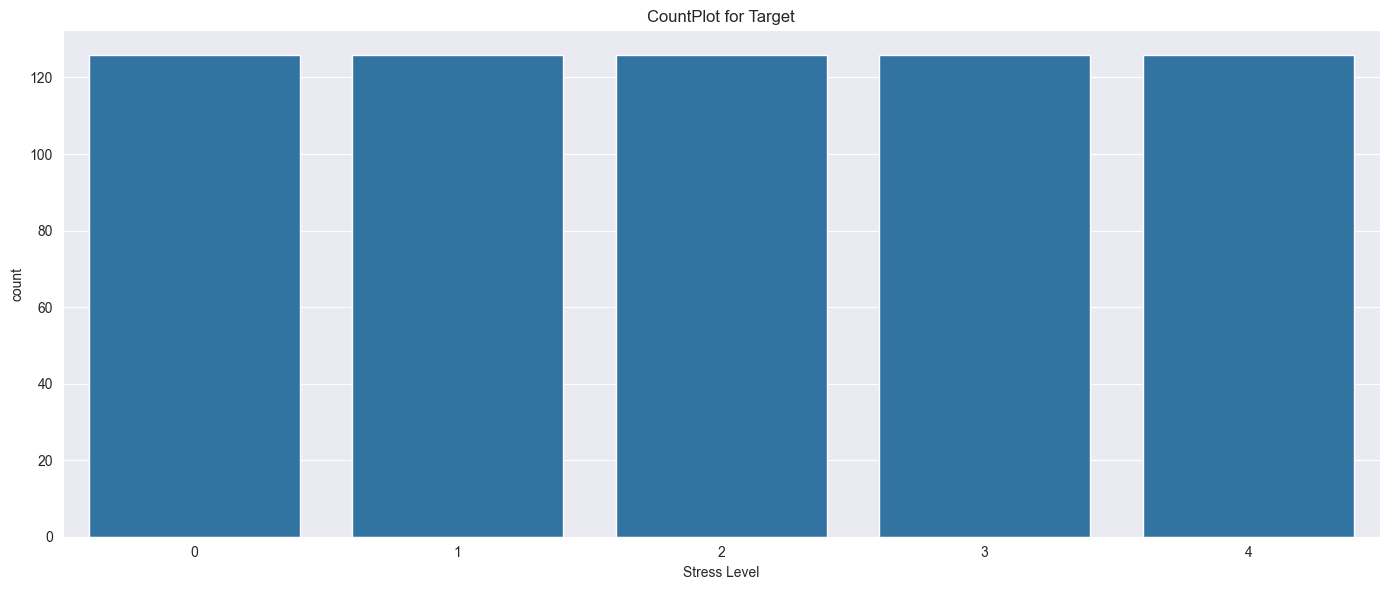

In [219]:
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
sns.countplot(data=df1, x='Stress Level',legend=False)   
plt.title('CountPlot for Target')
plt.tight_layout()
plt.show()

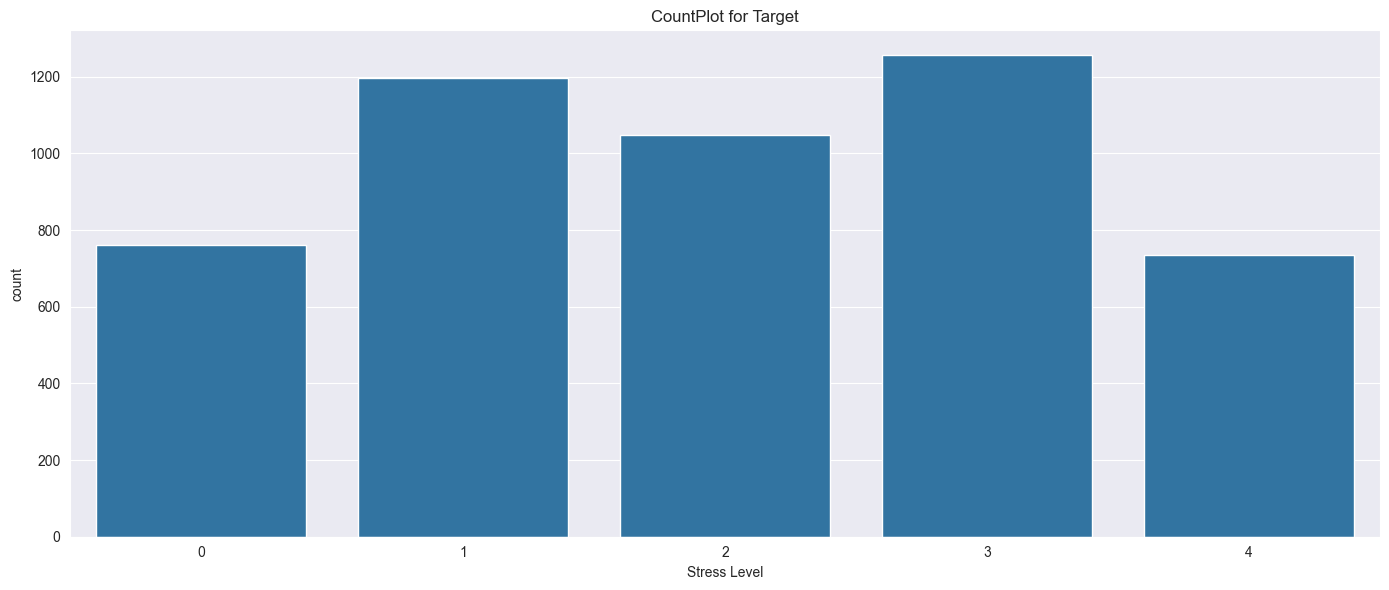

In [220]:
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
sns.countplot(data=synthetic_data, x='Stress Level',legend=False)   
plt.title('CountPlot for Target')
plt.tight_layout()
plt.show()

In [221]:
X_train, y_train, X_val, y_val, X_test, y_test =random_split_data(df1_data, df1_target, train_percentage=0.7, val_percentage=0.15, test_percentage=0.15, random_state=None)

In [222]:
lr = LogisticRegression( max_iter=1000)
mlp = MLPClassifier( max_iter=500)

In [223]:
sns.set_style('white')
pipe_lr = make_pipeline(lr)
pipe_lr.fit(X_train,y_train)
joblib.dump(pipe_lr, './lr_model.joblib')

C:\Users\selim\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['./lr_model.joblib']

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       115
           1       0.69      0.77      0.73       182
           2       0.73      0.74      0.73       145
           3       0.79      0.79      0.79       199
           4       0.84      0.76      0.80       109

    accuracy                           0.75       750
   macro avg       0.76      0.75      0.75       750
weighted avg       0.76      0.75      0.75       750



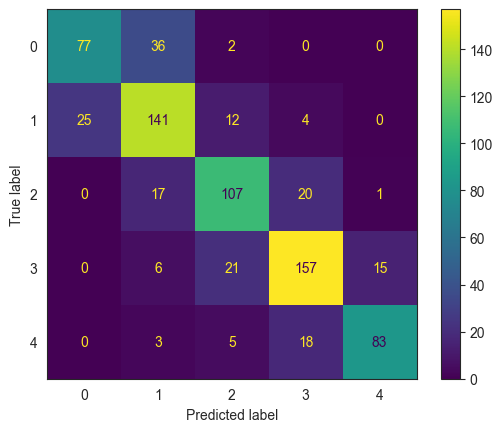

In [224]:
#for validation set
pred = pipe_lr.predict(X_val)
print(classification_report(y_val,pred))
ConfusionMatrixDisplay(confusion_matrix(y_val,pred)).plot()
score_lr = accuracy_score(y_val,pred)

              precision    recall  f1-score   support

           0       0.77      0.63      0.70       103
           1       0.71      0.76      0.74       179
           2       0.69      0.74      0.71       165
           3       0.72      0.69      0.71       177
           4       0.81      0.82      0.81       126

    accuracy                           0.73       750
   macro avg       0.74      0.73      0.73       750
weighted avg       0.73      0.73      0.73       750



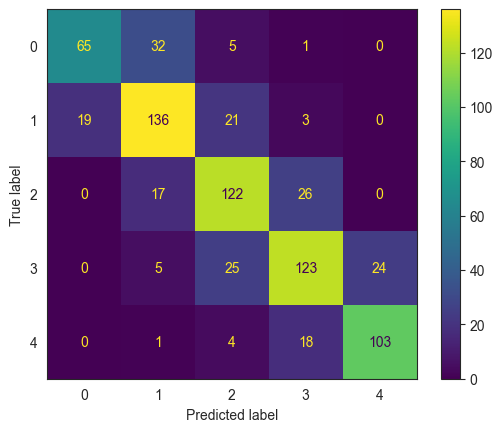

In [225]:
#for test set
pred = pipe_lr.predict(X_test)
print(classification_report(y_test,pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,pred)).plot()
score_lr = accuracy_score(y_test,pred)

In [226]:
# Define the MLP model with the best parameters
best_mlp = MLPClassifier(hidden_layer_sizes=(50, 8), alpha=0.001, learning_rate_init=0.001, activation='relu', solver='adam', random_state=42 )

# Create a pipeline with StandardScaler and the MLP model
pipe_mlp = make_pipeline(StandardScaler(with_mean=False), best_mlp)

# Fit the pipeline to the training data
pipe_mlp.fit(X_train, y_train)

# Save the model
joblib.dump(pipe_mlp, './best_mlp_model.joblib')

['./best_mlp_model.joblib']

In [227]:
# param_grid = {
#     'mlpclassifier__hidden_layer_sizes': [(50, 4), (100, 4), (50, 8)],
#     'mlpclassifier__alpha': [0.0001, 0.001, 0.01],
#     'mlpclassifier__learning_rate_init': [0.001, 0.01, 0.1],
#     'mlpclassifier__max_iter': [200, 500, 1000],  
# }

# grid_search = GridSearchCV(pipe_mlp, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# print("Best parameters: ", grid_search.best_params_)
#Best parameters:  {'mlpclassifier__alpha': 0.001, 'mlpclassifier__hidden_layer_sizes': (50, 8), 'mlpclassifier__learning_rate_init': 0.001, 'mlpclassifier__max_iter': 500}

              precision    recall  f1-score   support

           0       0.78      0.66      0.71       115
           1       0.69      0.79      0.74       182
           2       0.74      0.76      0.75       145
           3       0.80      0.75      0.77       199
           4       0.78      0.77      0.77       109

    accuracy                           0.75       750
   macro avg       0.76      0.75      0.75       750
weighted avg       0.75      0.75      0.75       750



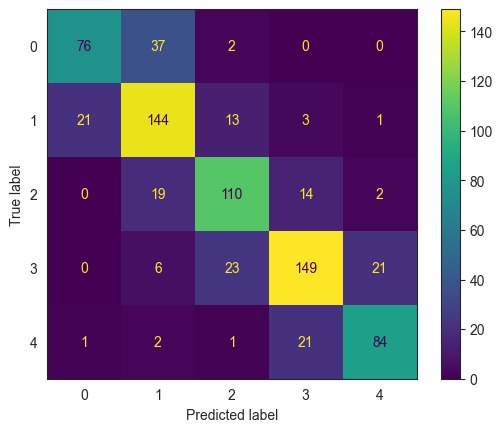

In [228]:
#validation
pred_mlp = pipe_mlp.predict(X_val)
print(classification_report(y_val, pred_mlp))
ConfusionMatrixDisplay(confusion_matrix(y_val, pred_mlp)).plot()
score_mlp = accuracy_score(y_val, pred_mlp)

              precision    recall  f1-score   support

           0       0.77      0.60      0.67       103
           1       0.72      0.79      0.75       179
           2       0.72      0.78      0.75       165
           3       0.74      0.71      0.73       177
           4       0.81      0.81      0.81       126

    accuracy                           0.75       750
   macro avg       0.75      0.74      0.74       750
weighted avg       0.75      0.75      0.75       750



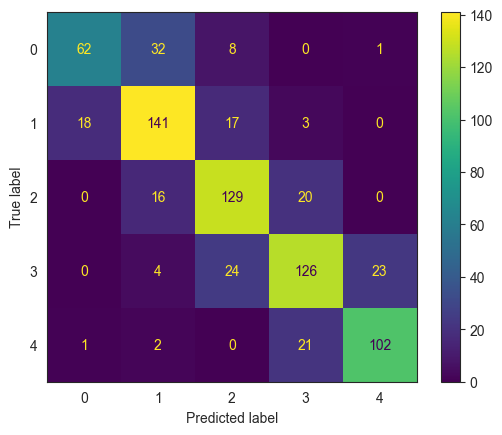

In [229]:
#test
pred_mlp = pipe_mlp.predict(X_test)
print(classification_report(y_test, pred_mlp))
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_mlp)).plot()
score_mlp = accuracy_score(y_test, pred_mlp)

In [230]:
#cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_lr = cross_val_score(lr, X_train, y_train, cv=cv, scoring='accuracy')
scores_mlp = cross_val_score(mlp, X_train, y_train, cv=cv, scoring='accuracy')

print("Logistic Regression Cross-Validation Scores:")
for i, score in enumerate(scores_lr):
    print(f"Fold {i + 1}: {score:.2f}")
print("Mean Accuracy: {:.2f}% (+/- {:.2f}%)".format(scores_lr.mean() * 100, scores_lr.std() * 2 * 100))

print("\nMLP Classifier Cross-Validation Scores:")
for i, score in enumerate(scores_mlp):
    print(f"Fold {i + 1}: {score:.2f}")
print("Mean Accuracy: {:.2f}% (+/- {:.2f}%)".format(scores_mlp.mean() * 100, scores_mlp.std() * 2 * 100))


C:\Users\selim\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\selim\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Logistic Regression Cross-Validation Scores:
Fold 1: 0.72
Fold 2: 0.75
Fold 3: 0.73
Fold 4: 0.73
Fold 5: 0.74
Mean Accuracy: 73.60% (+/- 2.04%)

MLP Classifier Cross-Validation Scores:
Fold 1: 0.72
Fold 2: 0.73
Fold 3: 0.74
Fold 4: 0.74
Fold 5: 0.72
Mean Accuracy: 73.11% (+/- 1.82%)
